# **1. Perkenalan Dataset**

Dataset yang digunakan adalah **Iris Dataset** dari scikit-learn.

**Informasi Dataset:**
- **Sumber**: UCI Machine Learning Repository / Scikit-learn built-in dataset
- **Jumlah Sampel**: 150
- **Jumlah Fitur**: 4 (sepal length, sepal width, petal length, petal width)
- **Target**: 3 kelas (Setosa, Versicolor, Virginica)
- **Tipe Problem**: Multi-class Classification

Dataset ini cocok untuk eksperimen machine learning karena:
1. Data sudah bersih dan terstruktur
2. Ukuran dataset kecil sehingga cepat diproses
3. Cocok untuk klasifikasi multi-kelas

# **2. Import Library**

In [1]:
# Import Library yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn untuk dataset dan preprocessing
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Untuk evaluasi
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

print("Library berhasil diimport!")

Library berhasil diimport!


# **3. Memuat Dataset**

In [2]:
# Load Iris Dataset dari sklearn
iris = load_iris()

# Konversi ke DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['species'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

print("Dataset berhasil dimuat!")
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")
print(f"\nNama kolom: {df.columns.tolist()}")

Dataset berhasil dimuat!
Jumlah baris: 150
Jumlah kolom: 6

Nama kolom: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'target', 'species']


In [3]:
# Preview data
print("Preview 10 baris pertama:")
display(df.head(10))

print("\nPreview 5 baris terakhir:")
display(df.tail())

Preview 10 baris pertama:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
5,5.4,3.9,1.7,0.4,0,setosa
6,4.6,3.4,1.4,0.3,0,setosa
7,5.0,3.4,1.5,0.2,0,setosa
8,4.4,2.9,1.4,0.2,0,setosa
9,4.9,3.1,1.5,0.1,0,setosa



Preview 5 baris terakhir:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica
149,5.9,3.0,5.1,1.8,2,virginica


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, kita akan melakukan eksplorasi data untuk memahami karakteristik dataset.

In [4]:
# Informasi dataset
print("="*50)
print("INFORMASI DATASET")
print("="*50)
print(df.info())

INFORMASI DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   species            150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


In [5]:
# Statistik deskriptif
print("\nStatistik Deskriptif:")
display(df.describe())


Statistik Deskriptif:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [6]:
# Cek missing values
print("\nMissing Values:")
print(df.isnull().sum())
print(f"\nTotal missing values: {df.isnull().sum().sum()}")


Missing Values:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
species              0
dtype: int64

Total missing values: 0


In [7]:
# Cek duplikat
print(f"\nJumlah data duplikat: {df.duplicated().sum()}")


Jumlah data duplikat: 1



Distribusi Kelas:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


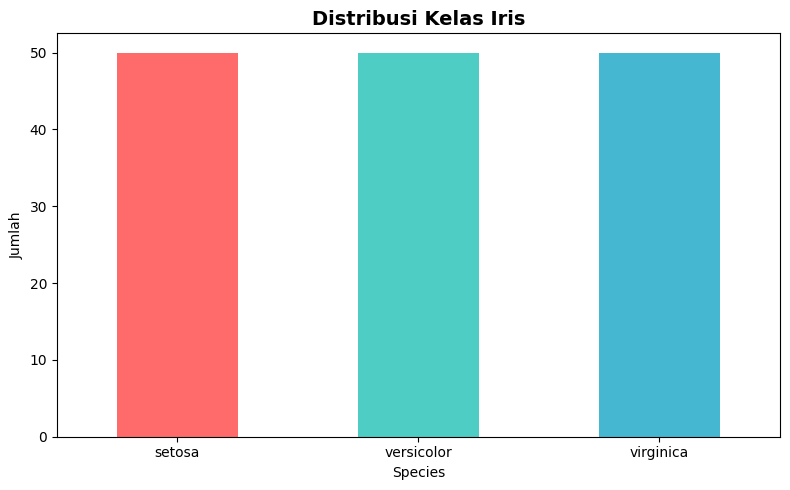

In [8]:
# Distribusi target/kelas
print("\nDistribusi Kelas:")
print(df['species'].value_counts())

# Visualisasi distribusi kelas
plt.figure(figsize=(8, 5))
df['species'].value_counts().plot(kind='bar', color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
plt.title('Distribusi Kelas Iris', fontsize=14, fontweight='bold')
plt.xlabel('Species')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

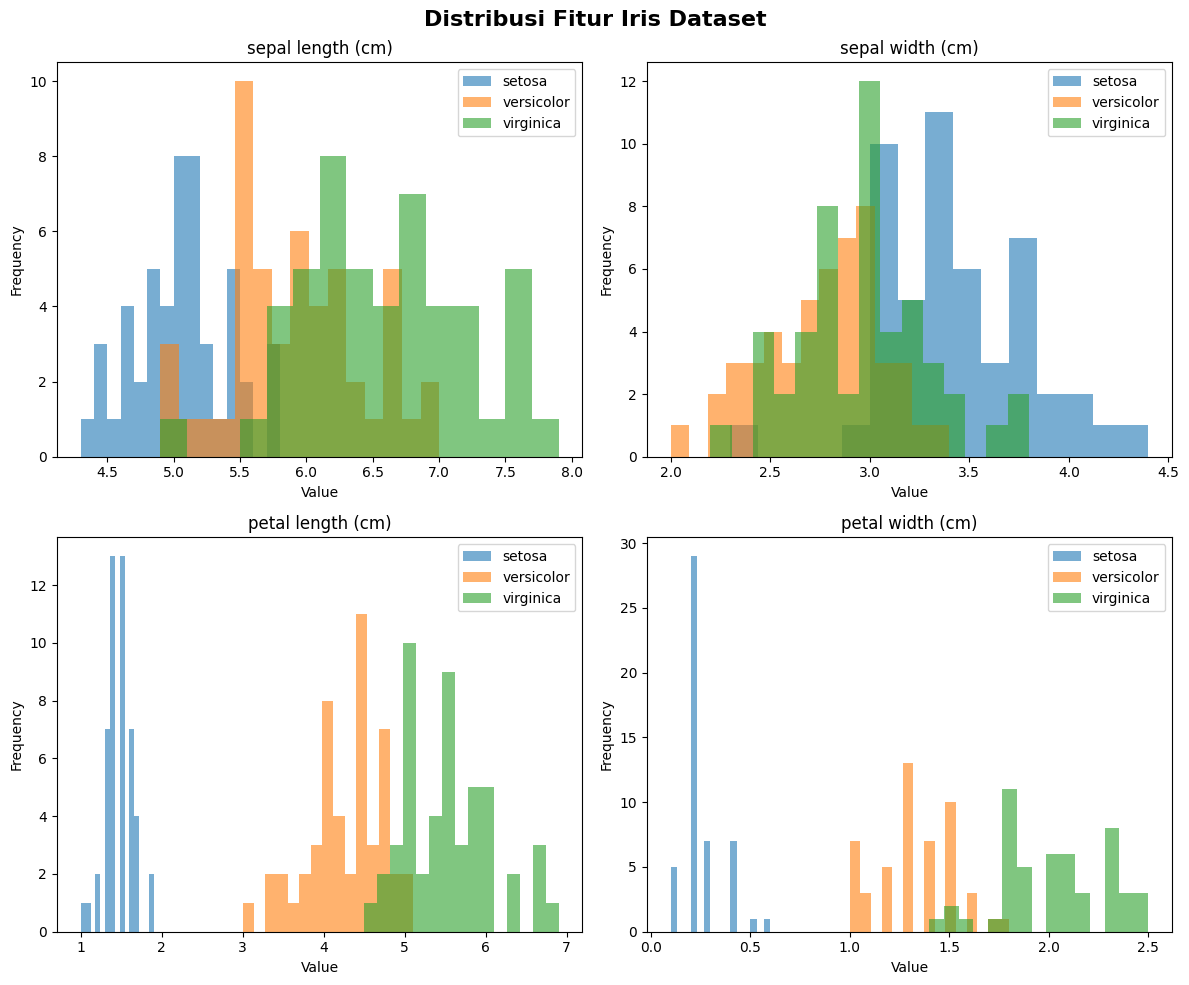

In [9]:
# Visualisasi distribusi fitur
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Distribusi Fitur Iris Dataset', fontsize=16, fontweight='bold')

features = iris.feature_names
for idx, (ax, feature) in enumerate(zip(axes.flat, features)):
    for species in df['species'].unique():
        subset = df[df['species'] == species]
        ax.hist(subset[feature], alpha=0.6, label=species, bins=15)
    ax.set_title(feature)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    ax.legend()

plt.tight_layout()
plt.show()

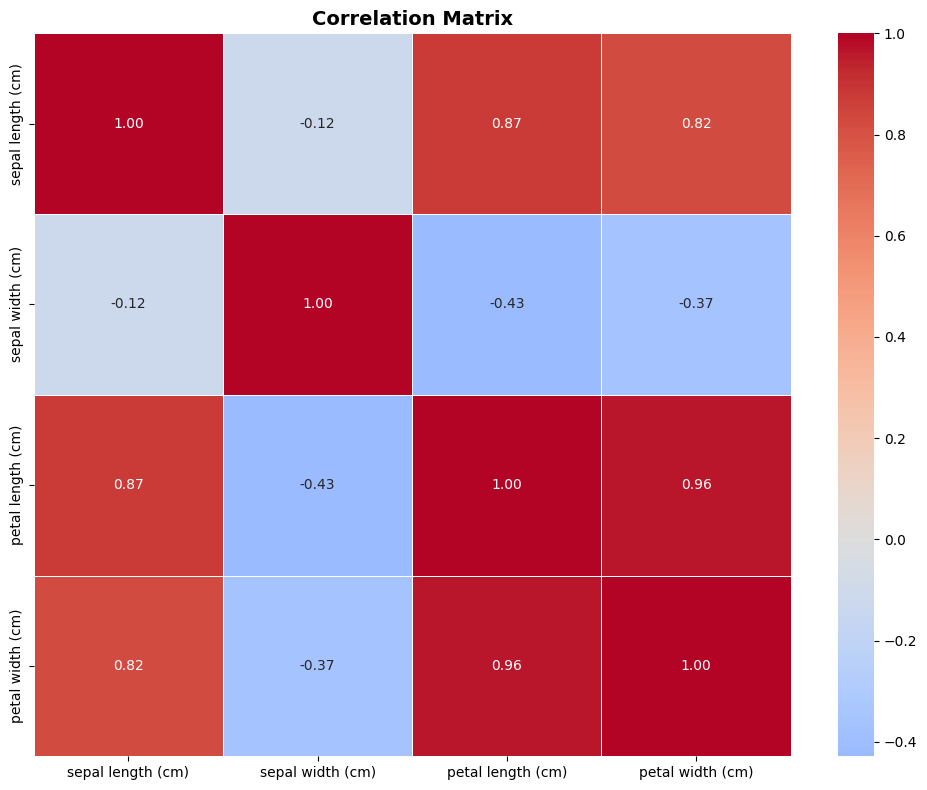

In [10]:
# Correlation Matrix
plt.figure(figsize=(10, 8))
correlation = df[iris.feature_names].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0,
            fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

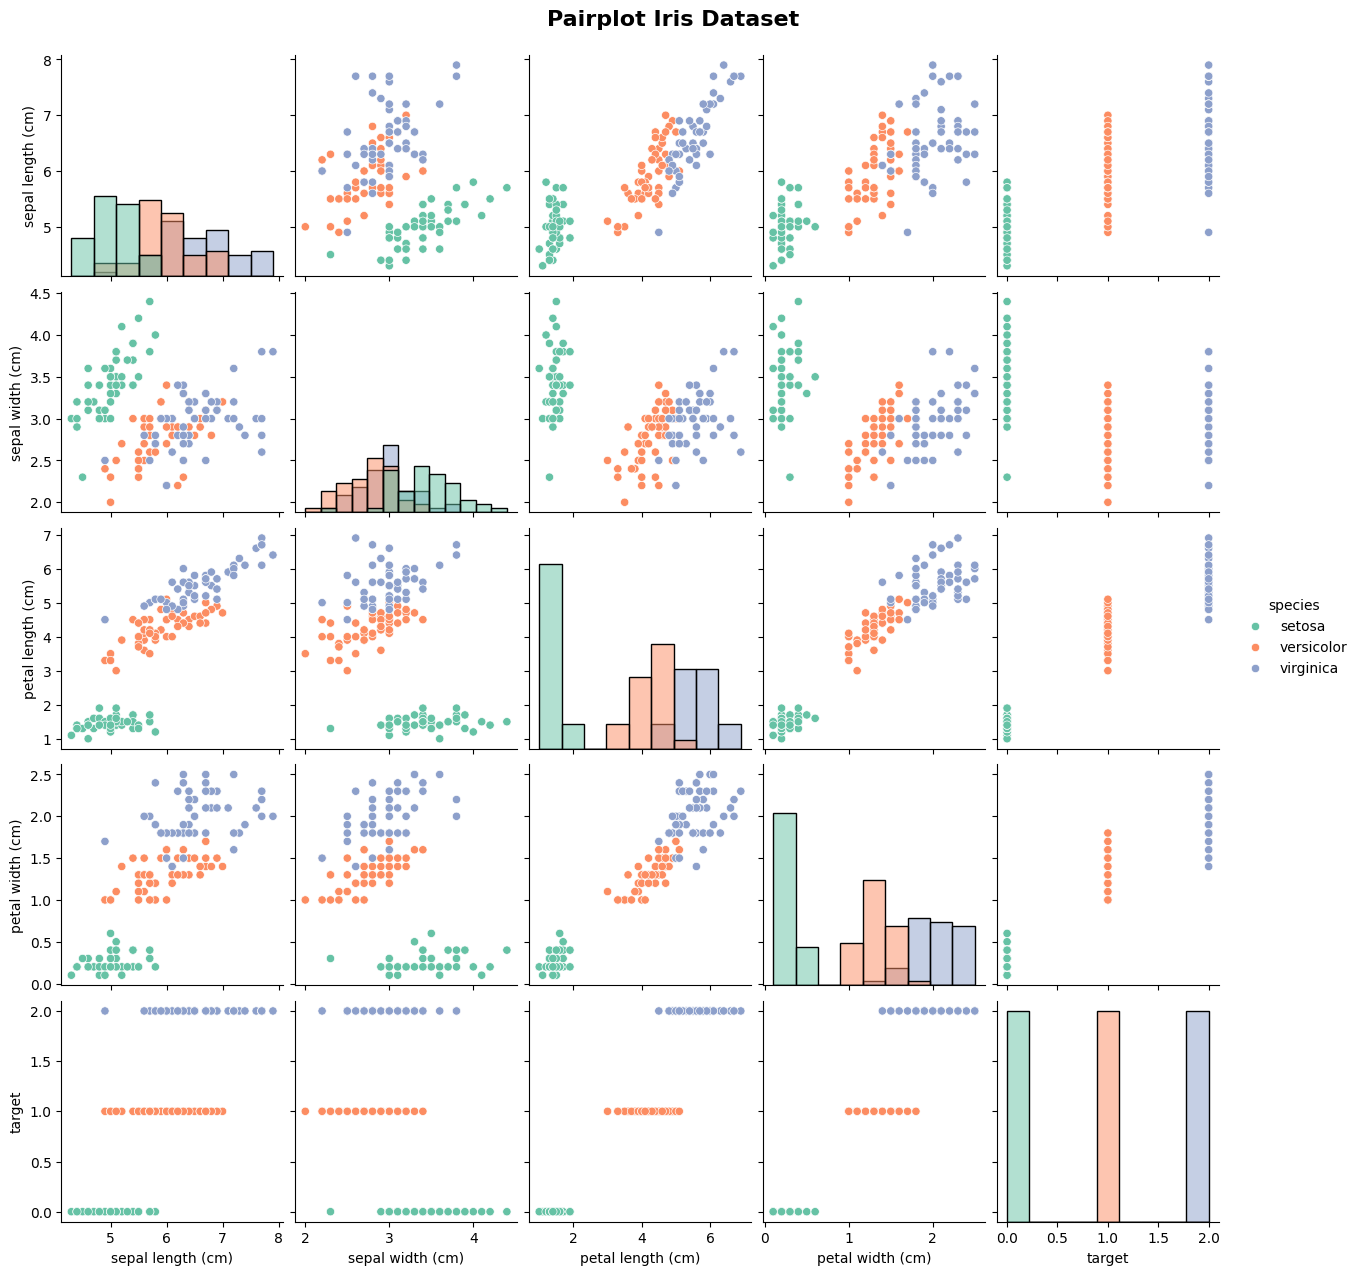

In [11]:
# Pairplot untuk melihat hubungan antar fitur
sns.pairplot(df, hue='species', palette='Set2', diag_kind='hist')
plt.suptitle('Pairplot Iris Dataset', y=1.02, fontsize=16, fontweight='bold')
plt.show()

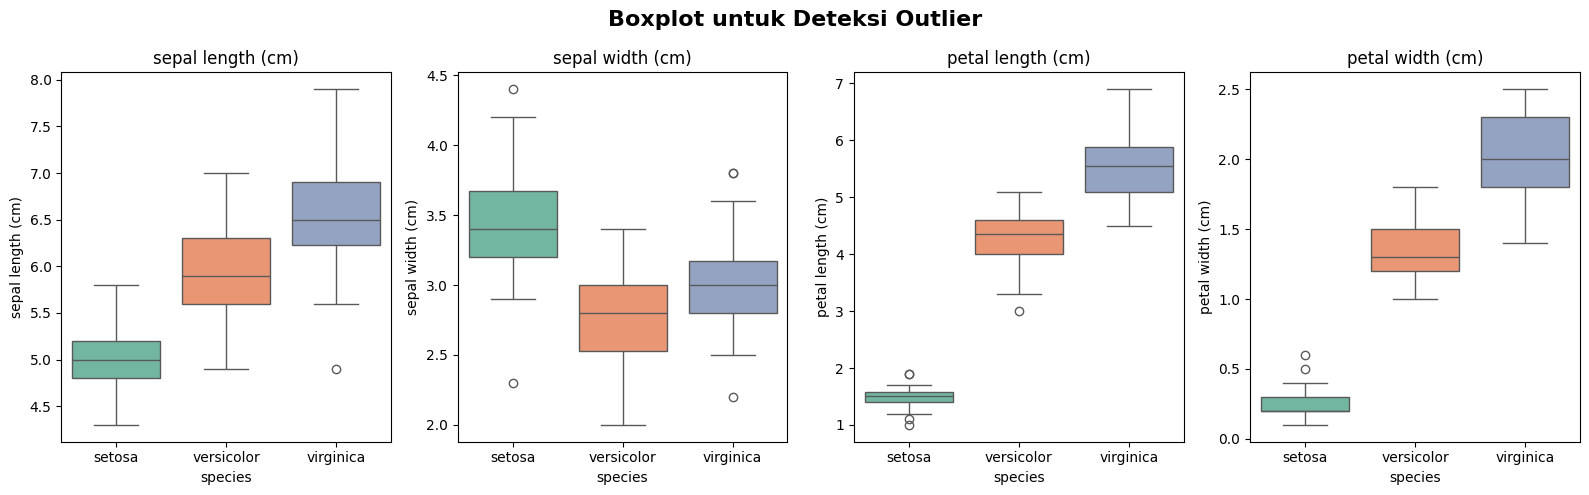

In [12]:
# Boxplot untuk deteksi outlier
fig, axes = plt.subplots(1, 4, figsize=(16, 5))
fig.suptitle('Boxplot untuk Deteksi Outlier', fontsize=16, fontweight='bold')

for idx, feature in enumerate(iris.feature_names):
    sns.boxplot(data=df, x='species', y=feature, ax=axes[idx], palette='Set2')
    axes[idx].set_title(feature)

plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, kita akan melakukan preprocessing data untuk mempersiapkan data sebelum digunakan dalam model machine learning.

Tahapan preprocessing:
1. Handling Missing Values (jika ada)
2. Handling Duplicates
3. Feature Selection
4. Train-Test Split
5. Feature Scaling (Standardization)

In [13]:
# 1. Handling Missing Values
print("="*50)
print("1. HANDLING MISSING VALUES")
print("="*50)

missing_values = df.isnull().sum()
print(f"Missing values per kolom:\n{missing_values}")

if missing_values.sum() == 0:
    print("\n✓ Tidak ada missing values dalam dataset")
else:
    # Handle missing values jika ada
    df = df.dropna()
    print(f"\n✓ Missing values telah dihapus")

1. HANDLING MISSING VALUES
Missing values per kolom:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
species              0
dtype: int64

✓ Tidak ada missing values dalam dataset


In [14]:
# 2. Handling Duplicates
print("\n" + "="*50)
print("2. HANDLING DUPLICATES")
print("="*50)

duplicates = df.duplicated().sum()
print(f"Jumlah data duplikat: {duplicates}")

if duplicates > 0:
    df = df.drop_duplicates()
    print(f"✓ Data duplikat telah dihapus")
    print(f"Jumlah data setelah penghapusan: {len(df)}")
else:
    print("✓ Tidak ada data duplikat")


2. HANDLING DUPLICATES
Jumlah data duplikat: 1
✓ Data duplikat telah dihapus
Jumlah data setelah penghapusan: 149


In [15]:
# 3. Feature Selection
print("\n" + "="*50)
print("3. FEATURE SELECTION")
print("="*50)

# Pisahkan fitur (X) dan target (y)
X = df[iris.feature_names]
y = df['target']

print(f"Fitur yang digunakan: {iris.feature_names}")
print(f"Target: target (0=setosa, 1=versicolor, 2=virginica)")
print(f"\nShape X: {X.shape}")
print(f"Shape y: {y.shape}")


3. FEATURE SELECTION
Fitur yang digunakan: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target: target (0=setosa, 1=versicolor, 2=virginica)

Shape X: (149, 4)
Shape y: (149,)


In [16]:
# 4. Train-Test Split
print("\n" + "="*50)
print("4. TRAIN-TEST SPLIT")
print("="*50)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.0f}%)")
print(f"Test set: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.0f}%)")

print(f"\nDistribusi kelas di training set:")
print(y_train.value_counts().sort_index())

print(f"\nDistribusi kelas di test set:")
print(y_test.value_counts().sort_index())


4. TRAIN-TEST SPLIT
Training set: 119 samples (80%)
Test set: 30 samples (20%)

Distribusi kelas di training set:
target
0    40
1    40
2    39
Name: count, dtype: int64

Distribusi kelas di test set:
target
0    10
1    10
2    10
Name: count, dtype: int64


In [17]:
# 5. Feature Scaling (Standardization)
print("\n" + "="*50)
print("5. FEATURE SCALING (STANDARDIZATION)")
print("="*50)

scaler = StandardScaler()

# Fit pada training data, transform pada training dan test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Konversi ke DataFrame untuk visualisasi
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=iris.feature_names)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=iris.feature_names)

print("Statistik sebelum scaling (Training):")
display(X_train.describe().round(2))

print("\nStatistik setelah scaling (Training):")
display(X_train_scaled_df.describe().round(2))


5. FEATURE SCALING (STANDARDIZATION)
Statistik sebelum scaling (Training):


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,119.00,119.00,119.00,119.00
mean,5.86,3.06,3.76,1.20
std,0.84,0.44,1.77,0.76
min,4.30,2.00,1.10,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.30,1.30
75%,6.40,3.35,5.10,1.80
max,7.90,4.40,6.90,2.50



Statistik setelah scaling (Training):


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,119.00,119.00,119.00,119.00
mean,-0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00
min,-1.86,-2.39,-1.51,-1.44
25%,-0.91,-0.59,-1.23,-1.18
50%,-0.07,-0.13,0.30,0.13
75%,0.64,0.66,0.76,0.79
max,2.42,3.03,1.78,1.71


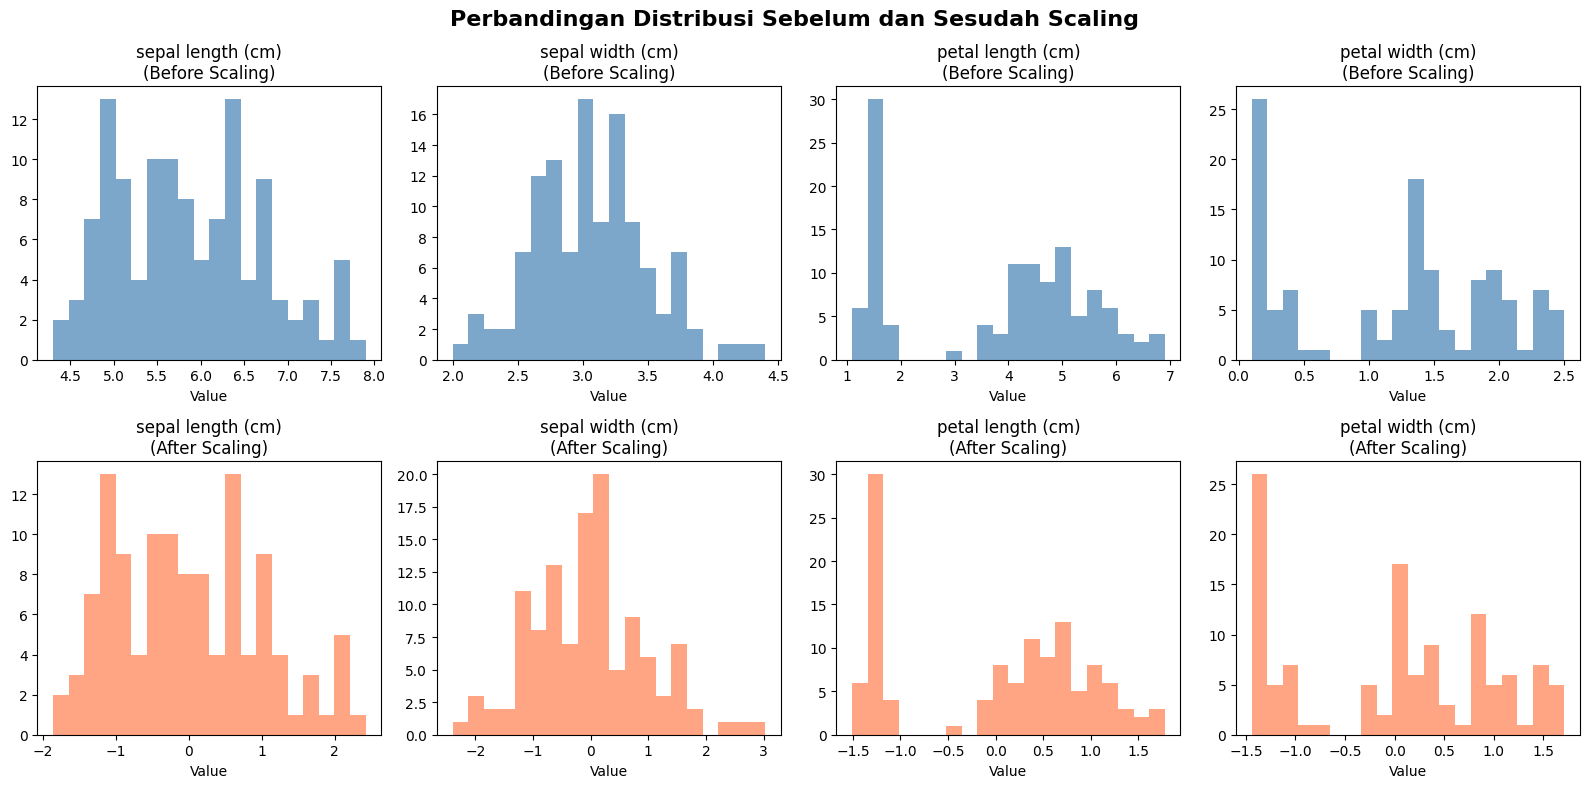

In [18]:
# Visualisasi perbandingan sebelum dan sesudah scaling
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
fig.suptitle('Perbandingan Distribusi Sebelum dan Sesudah Scaling', fontsize=16, fontweight='bold')

for idx, feature in enumerate(iris.feature_names):
    # Sebelum scaling
    axes[0, idx].hist(X_train[feature], bins=20, color='steelblue', alpha=0.7)
    axes[0, idx].set_title(f'{feature}\n(Before Scaling)')
    axes[0, idx].set_xlabel('Value')

    # Sesudah scaling
    axes[1, idx].hist(X_train_scaled_df[feature], bins=20, color='coral', alpha=0.7)
    axes[1, idx].set_title(f'{feature}\n(After Scaling)')
    axes[1, idx].set_xlabel('Value')

plt.tight_layout()
plt.show()

In [19]:
# Simpan data yang sudah dipreprocessing
print("\n" + "="*50)
print("MENYIMPAN DATA PREPROCESSING")
print("="*50)

# Gabungkan X dan y untuk disimpan
train_data = pd.DataFrame(X_train_scaled, columns=iris.feature_names)
train_data['target'] = y_train.values

test_data = pd.DataFrame(X_test_scaled, columns=iris.feature_names)
test_data['target'] = y_test.values

# Simpan ke CSV
train_data.to_csv('iris_train_preprocessed.csv', index=False)
test_data.to_csv('iris_test_preprocessed.csv', index=False)

print("✓ Data training disimpan ke 'iris_train_preprocessed.csv'")
print("✓ Data test disimpan ke 'iris_test_preprocessed.csv'")

print(f"\nShape training data: {train_data.shape}")
print(f"Shape test data: {test_data.shape}")


MENYIMPAN DATA PREPROCESSING
✓ Data training disimpan ke 'iris_train_preprocessed.csv'
✓ Data test disimpan ke 'iris_test_preprocessed.csv'

Shape training data: (119, 5)
Shape test data: (30, 5)


In [20]:
# Summary Preprocessing
print("\n" + "="*50)
print("SUMMARY PREPROCESSING")
print("="*50)
print(f"""
Dataset: Iris Dataset
Total samples: {len(df)}
Features: {len(iris.feature_names)}
Classes: 3 (setosa, versicolor, virginica)

Preprocessing Steps:
1. ✓ Missing values handling (no missing values)
2. ✓ Duplicate handling (removed if any)
3. ✓ Feature selection (4 features)
4. ✓ Train-test split (80-20)
5. ✓ Feature scaling (StandardScaler)

Output:
- Training set: {len(X_train)} samples
- Test set: {len(X_test)} samples
- Files saved: iris_train_preprocessed.csv, iris_test_preprocessed.csv
""")


SUMMARY PREPROCESSING

Dataset: Iris Dataset
Total samples: 149
Features: 4
Classes: 3 (setosa, versicolor, virginica)

Preprocessing Steps:
1. ✓ Missing values handling (no missing values)
2. ✓ Duplicate handling (removed if any)
3. ✓ Feature selection (4 features)
4. ✓ Train-test split (80-20)
5. ✓ Feature scaling (StandardScaler)

Output:
- Training set: 119 samples
- Test set: 30 samples
- Files saved: iris_train_preprocessed.csv, iris_test_preprocessed.csv

